># TensorFlow 준비하기

- TensorFlow는 Google이 2015년에 공개한 머신러닝 오픈소스 프레임워크임
- GCP와 상성이 매우 좋으며, GCS와 입출력을 연동하는 기능, Dataflow와 ML Engine 같은 TensorFlow를 풀 매니지드로 운용 가능한 환경 제공

In [1]:
import tensorflow as tf

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


___
>## Datalab에서 TensorFlow 사용하기

- TensorFlow를 활용한 예제는 아래를 참조:

In [1]:
with tf.Graph().as_default():
  # 상수 정의하기
  x = tf.constant(10.0, name = 'x')
  y = tf.constant(32.0, name = 'y')
  
  # 더하기
  op = tf.add(x, y)
  
  # 연산 실행하기
  with tf.Session() as sess:
    result = sess.run(op)

print(result)

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


42.0


- TensorFlow의 흐름을 정리해 보면:  
    1. 계산 그래프 정의하기  
    2. 세션 정의하기  
    3. 연산 실행하기  
    순서로 프로세스 실행

#### 1. 계산 그래프 정의하기

- `tf.constant`로 상수를 정의 (`tf.placeholder`, `tf.variable` 등으로 계산그래프의 노드 정의 가능)
- `tf.add`로 연산을 정의하고 노드 간 관계를 정의
- 이렇게 만든 계산그래프를 `tf.Graph().as_default()`로 정의
- 단, with 구문으로 정의했으므로 구문을 벗어날 떄 자동 해제 (Datalab을 사용할 경우 특정 블록을 여러번 실행할 수 있으므로 with 구문으로 네트워크가 다른 이름으로 생성되는 것을 방지)

#### 2. 세션 정의하기

- `tf.Session()`으로 '계산을 실행하는 단위'인 세션을 정의

#### 3. 연산 실행하기
- 세션의 `run()`을 호출하여 계산그래프 계산을 실행

___
>## 변수와 플레이스홀더

- 실제 계산에서 x와 y에 상숫값이 설정되는 경우는 전무
- 변화하는 값을 다루는 경우를 지원하기 위해 '변수<sub>Variable</sub>'와 '플레이스홀더<sub>Placeholder</sub>'라는 기능 존재
- '변수'는 다양한 값을 넣을 수 있는 상자로 '가중치' 같이 학습에 따라 변화하는 값은 '변수로 정의하여 사용
- '플레이스홀더'는 외부에서 입력을 받아 변수로 사용하는 기능으로, 특징량을 입력받는 경우 플레이스홀더를 사용

In [10]:
with tf.Graph().as_default():
  # x는 플레이스홀더
  x = tf.placeholder(tf.int32, name = 'x')
  y = tf.constant(32, name = 'y')
  
  # 더하기
  op1 = tf.add(x,y)
  
  # z 변수 생성
  z = tf.Variable(0, name = 'z')
  
  # 연산 결과를 변수에 지정
  op2 = tf.assign(z, op1)
  
  # 변수 초기화하기
  init_op = tf.global_variables_initializer()
  
  # 연산 실행
  with tf.Session() as sess:
    sess.run(init_op)
    result = sess.run(op2, feed_dict = {x:10})


print(result)

42


- `y`는 상수값을 지정하였고, `x`는 `int32`를 자료형으로 갖는 플레이스홀더를 정의
- `sess.run()`의 매개변수로 `feed_dict = {x:10}`으로 플레이스홀더 값 전달
- 변수는 `tf.Variable(0, name = 'z')`로 초기값을 0으로 지정하였으나 `tf.global_variables_initializer()`로 상태 초기화(권장)
- 연산 결과를 변수 `z`에 대입할 때에는 `tf.assign`을 사용

___
>## 로지스틱 회귀로 식별하기

- 샘플 데이터는 이전과 마찬가지로 `make_blobs`를 사용해서 생성
- TensorFlow가 기본적으로 읽어들이는 입력 형태를 감안하여 `y_dataset`은 (-1, 1)로 `reshape` 수행 (`reshape`에서 -1은 임의의 값 의미: `y_dataset.reshape(len(y_dataset),1) = y_dataset.reshape(-1,1)`)

In [40]:
import pandas as pd
from sklearn.datasets import make_blobs

X_dataset, y_dataset = make_blobs(centers = [[-0.3, 0.3], [0.3, -0.2]], 
                                 cluster_std =0.2,
                                 n_samples = 100,
                                 center_box = (-1., 1.),
                                 random_state = 42)

dataset = pd.DataFrame(X_dataset, columns = ['x0', 'x1'])
dataset['y'] = y_dataset
y_dataset = y_dataset.reshape(-1,1)
y_dataset[:10]

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]])

- 입력할 값(`X_dataset`)은 2차원 데이터이고, 레이블(`y_dataset`)은 1차원 데이터로, `placeholder`의 `shape`은 [None, 2], [None, 1]을 따름 (여기서 None은 위 `reshape`의 -1과 같은 의미)

In [30]:
# 특징량과 레이블 입력
x = tf.placeholder(tf.float32, shape = [None, 2], name = 'x')
y = tf.placeholder(tf.float32, shape = [None, 1], name = 'y')

- 가중치와 편향은 `Variable`로 정의
- 손실함수는 여러가지가 제공되며, 현 예제에서는 로지스틱 회귀를 사고 있기 때문에 `sigmoid_cross_entropy_with_logits`를 사용 (`softmax_cross_entropy_with_logits` 등도 있음)

In [32]:
# 가중치와 편향 정의
w = tf.Variable(tf.zeros([2, 1], name = 'w'))
b = tf.Variable(tf.zeros([1], name = 'b'))

# 식별 경계로부터 거리 구하기
score = tf.sigmoid(tf.matmul(x, w) + b)

# 손실 구하기
loss = tf.reduce_mean(
  tf.nn.sigmoid_cross_entropy_with_logits(logits = score, labels = y))

- 손실에 따른 경사하강법은 `GradientDescentOptimizer`로 연산을 정의 (학습률 1.0으로 학습)

In [34]:
# 경사하강법으로 학습
train_step = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

# 변수 초기화 하기
init_op = tf.global_variables_initializer()

- 학습 실행은 마찬가지로 `tf.Session().run()`으로 실행
- `placeholder`에  `x`와 `y`를 전달하고 `train_step`을 실행
- 중간중간 `loss`, `w`, `b` 값을 추출

In [38]:
# 연산 실행
with tf.Session() as sess:
  # 변수 초기화
  sess.run(init_op)
  
  # 학습 수행 (400번)
  for i in range(400):
    _, _l, _w, _b = sess.run([train_step, loss, w, b],
                            feed_dict = {x: X_dataset, y: y_dataset})
    
    # 100번에 한번 진행상황 출력
    if i % 100 ==0:
      print(_l, _w, _b)

0.72407705 [[ 0.03871037]
 [-0.03033806]] [-0.03061483]
0.59664816 [[ 2.677316 ]
 [-1.9884852]] [-0.3986451]
0.56502515 [[ 4.1164765]
 [-2.9697428]] [-0.20172487]
0.5512945 [[ 5.0926847]
 [-3.5960445]] [-0.10895684]


- 추출한 가중치, 편향으로 식별경계를 그려보면 아래와 같음

In [39]:
def plot_boundary(w):
  x = np.arange(-1.0, 1.1, 0.1)
  y = eval('%f*x + %f' % ((-w[1] / (w[2]+1e-6)), (-w[0]/(w[2]+1e-6))))
  plt.plot(x, y, linewidth = 2)
  
  
# scatter plot 함수 (개인 버전)
def plot_scatter():
  sns.lmplot('x0', 'x1', hue = 'y', data = dataset, fit_reg= False)
  plt.ylim(-1, 1)
  plt.xlim(-1,1)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


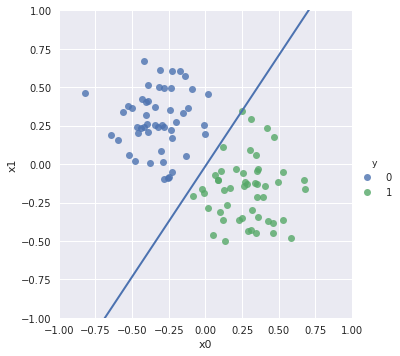

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plot_scatter()
plot_boundary([_b[0], _w[0][0], _w[1][0]])

In [55]:
[_b[0], _w[0][0], _w[1][0]]

[-0.04950974,
 array([5.8336267], dtype=float32),
 array([-4.049481], dtype=float32)]